In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# Intro - scikit-learn (sklearn)

What does this cover: 
0. End-to-end workflow
1. Getting data ready
2. Choose the right estimator/algo for our problem
3. Fit the model/algo and use it to make predictions
4. Evaluating a model
5. Improve model
6. Save and load a trained model
7. Putting it all together


## Workflow

## 0. Getting data ready

In [ ]:
# 1. Getting data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
heart_disease = pd.read_csv("/content/90 - heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Create X (features matrix)
X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

## 1. Choose the right model and hyperparameters (tunings)

In [ ]:
#Fixing warnings
# If you don't put n_estimators = 100, it'll show a warning. To fix that
import warnings
warnings.filterwarnings("ignore") # Ignore all warnings

In [ ]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
executable: /usr/bin/python3
   machine: Linux-5.15.107+-x86_64-with-glibc2.31

Python dependencies:
      sklearn: 1.2.2
          pip: 23.1.2
   setuptools: 67.7.2
        numpy: 1.22.4
        scipy: 1.10.1
       Cython: 0.29.34
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-2f7c42d4.3.18.so
        version: 0.3.18
threading_layer: pthreads
   architecture: Haswell
    num_threads: 2

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
        version: None
    num_threads: 2

       user_api: blas
   internal_api: openblas
         prefix: libopenbl

In [ ]:
# 2. Choose the right model and hyperparameters (tunings)
# For now, we need to classify
from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier()
clf  = RandomForestClassifier(n_estimators=100)

# Keeping default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 2. Fit the model to the data

In [ ]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
#Fit the model
clf.fit(X_train, Y_train);

## 3. Make predictions

In [ ]:
# Make a prediction. But this won't work, bcz our x label is different (all cols without target col)
y_label = clf.predict(np.array([0,2,3,4]))

In [ ]:
# Predicted values
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
# Actual values
Y_test

97     1
271    0
10     1
183    0
297    0
      ..
132    1
140    1
34     1
94     1
134    1
Name: target, Length: 61, dtype: int64

## 4. Evaluate the model on training data and test data

In [ ]:
# 4. Evaluate the model on training data and test data
# Check for labels
clf.score(X_train, Y_train)

1.0

In [ ]:
# This gives the accuracy of our model
clf.score(X_test, Y_test)

0.8360655737704918

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test, y_preds))
confusion_matrix(Y_test, y_preds)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        31
           1       0.81      0.87      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



array([[25,  6],
       [ 4, 26]])

## 5. Improve the model

In [ ]:
np.random.seed(42)
for i in range(10, 100, 10):
  print(f"Modelling with {i} n_estimators")
  clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
  print(f"Model accuracy on test set: {clf.score(X_test, Y_test) * 100 :.2f}% \n")

Modelling with 10 n_estimators
Model accuracy on test set: 80.33% 

Modelling with 20 n_estimators
Model accuracy on test set: 85.25% 

Modelling with 30 n_estimators
Model accuracy on test set: 78.69% 

Modelling with 40 n_estimators
Model accuracy on test set: 86.89% 

Modelling with 50 n_estimators
Model accuracy on test set: 86.89% 

Modelling with 60 n_estimators
Model accuracy on test set: 83.61% 

Modelling with 70 n_estimators
Model accuracy on test set: 81.97% 

Modelling with 80 n_estimators
Model accuracy on test set: 83.61% 

Modelling with 90 n_estimators
Model accuracy on test set: 85.25% 



## 6. Save a model and load it

In [ ]:
import pickle
pickle.dump(clf, open("first_model_heart_disease_predictor.pkl", "wb"))

In [ ]:
loaded_model = pickle.load(open("first_model_heart_disease_predictor.pkl", "rb"))
loaded_model.score(X_test, Y_test)

0.8524590163934426

# 1. Getting data ready

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

3 main things to follow
1. Split the data into features and labels(`X` and `Y`)
2. Fill/disregard missings values
3. Covert non-numeric values to numeric values - aka. Feature encoding

In [ ]:
heart_disease = pd.read_csv('/content/90 - heart-disease.csv')
heart_disease.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
X = heart_disease.drop("target", axis = 1)
X.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2


In [ ]:
y = heart_disease["target"]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, len(heart_disease)

NameError: ignored

## 1. Convert to numbers

In [3]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head(), len(car_sales), car_sales.dtypes

(     Make Colour  Odometer (KM)  Doors  Price
 0   Honda  White          35431      4  15323
 1     BMW   Blue         192714      5  19943
 2   Honda  White          84714      4  28343
 3  Toyota  White         154365      4  13434
 4  Nissan   Blue         181577      3  14043,
 1000,
 Make             object
 Colour           object
 Odometer (KM)     int64
 Doors             int64
 Price             int64
 dtype: object)

In [7]:
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

### 1. Build a model

In [8]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: ignored

In [10]:
# Turn categpries into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_x = transformer.fit_transform(X)
transformed_x 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [12]:
pd.DataFrame(transformed_x)

#To see how it's done
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [14]:
# refit the model
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_x, y, train_size = 0.8)
model.fit(X_train, y_train)

0.3235867221569877

In [15]:
model.score(X_test, y_test)

0.3235867221569877

## 2. Handling missing values

In [3]:
car_sales_missing = pd.read_csv("/content/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [6]:
# Try to convert into numerical
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, len(car_sales_missing)


((800, 4), (200, 4), (800,), (200,), 1000)

### Handling missing values Option 1 : Using Pandas

In [7]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [13]:
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [16]:
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()
len(car_sales_missing)


950

### Handling missing values Option 2 : Using Scikit-learn

In [17]:
car_sales_missing = pd.read_csv("/content/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [18]:
car_sales_missing.dropna(subset=["Price"] , inplace=True)
X = car_sales_missing.drop("Price", axis= 1)
y = car_sales_missing["Price"]

In [21]:
#FIlling missing values by imputation
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# FIll categorical values with "missing" and numerical with mean
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "msissing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

#Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer (that fills missing values)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature) 
])

#Transform the data
filled_x = imputer.fit_transform(X)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [23]:
car_sales_filled = pd.DataFrame(filled_x, columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [24]:
# Turn categpries into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x 

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [31]:
# Let's fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_x, y, train_size = 0.8)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

# 2. Choosing the right estimator/algorithm for our problem

Classification problem - Predicting a category </br>
Regression Problem - Predicting a number

Some datasets are built into sklearn. You can use them too

## 2.1 Regression Problem

In [22]:
# Get CA housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [23]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.rename(columns= {"MedHouseVal" : "target"}, inplace = True)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [26]:
# Few features should be imp
#Since we don't know we gonna experiment

from sklearn.linear_model import Ridge
np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y ,train_size = 0.8)

model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5758549611440126

**Ensemble** is the combination of smaller models to try and make better predictions than just a single model. Refer
[Ensemble models](https://scikit-learn.org/stable/modules/ensemble.html)

In [31]:
#Using ensembles
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y ,train_size = 0.8)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8066196804802649

## 2. Classification problem

In [9]:
hd = pd.read_csv('/content/heart-disease.csv')
from sklearn.svm import LinearSVC

np.random.seed(42)
X = hd.drop("target", axis = 1)
y = hd["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y ,train_size = 0.8)

clf = LinearSVC(max_iter =1000000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [11]:
#Import
from sklearn.ensemble import RandomForestClassifier

#Random seed
np.random.seed(42)

# Make data
X = hd.drop("target", axis = 1)
y = hd["target"]

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y ,train_size = 0.8)

#Create a model
clf = RandomForestClassifier()

#Fit/Train the model with our Training data
clf.fit(X_train, y_train)

#Test model using test data
clf.score(X_test, y_test)

0.8524590163934426

**TidBits**
1. If structured data, go for ensemble models (tables)
2. If unstructured data, use **Deep Learning** or **Transfer Learning** (audio, img, conversation text)


# 3. Fit the model to data

`X` - feature variables, data, feature </br>
`Y` - target, labels, target variables

In [ ]:
#This is the fitting
# clf.fit(X_train, y_train)

## 3.1 Make predictions
Two ways to make predictions: 
1. `predict()` 
2. `predict_proba()` 

In [18]:
#Use the model to predict
y_preds = clf.predict(X_test)

In [ ]:
np.array(y_test)

In [19]:
np.mean(y_preds == y_test)

0.8524590163934426

## 3.2 Make Evaluation

In [30]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mean_absolute_error(y_preds, y_test)

0.3265721842781009

# 4. Evaluating model

Three ways
1. `score()`
2. Using the `scoring` parameter
3. Problem Specific - metric functions


## 4.2 Using custom scoring parameter

### Accuracy

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

hd = pd.read_csv('/content/heart-disease.csv')

np.random.seed(42)
X = hd.drop("target", axis = 1)
y = hd["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y ,train_size = 0.8)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [38]:
arr = cross_val_score(clf, X, y, cv=5, scoring=None)
cvs = np.mean(arr)

print(f"Heart disease predictor cross-val accuracy: {cvs*100:.2f}%")

Heart disease predictor accuracy: 81.84%


### Area under Reciever Operating Characteristic (ROC / AUC) curve
Area under Curve - AUC
RUC
* True positive - model predicts 1, when truth = 1
* False positive - model predicts 0, when truth = 1
* True negative - model predicts 0, when truth = 0
* False negative - model predicts 1, when truth = 0

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_probs = clf.predict_proba(X_test)
y_probs_pos = y_probs[:, 1]
y_probs_pos[:5]

array([0.11, 0.51, 0.57, 0.16, 0.82])

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_pos)

PLOT CURVE

In [55]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color="orange", label="ROC")
  plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Geussing")

  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.title("ROC curve")
  plt.legend()
  plt.show()

# plot_roc_curve(fpr, tpr)
roc_auc_score(y_test, y_probs_pos)

0.9304956896551724

### Confusion Matrix

A quick way to compare the label a model predicts and the actual labels it was supposed to predict
In essence, prictures where the model is getting confused.

In [56]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [57]:
pd.crosstab(y_test, y_preds, rownames=["actual label"], colnames=["Predicted labels"])


Predicted labels,0,1
actual label,,
0,24,5
1,4,28


<Axes: >

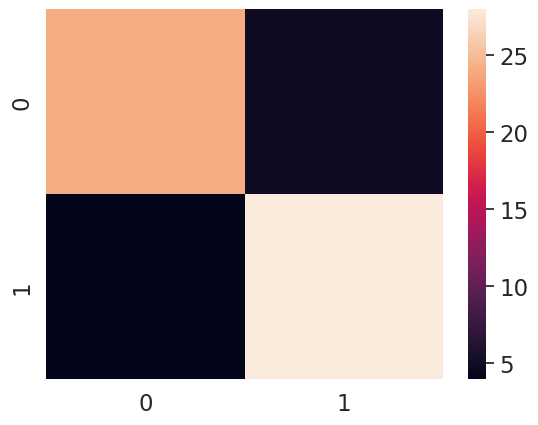

In [58]:
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat)

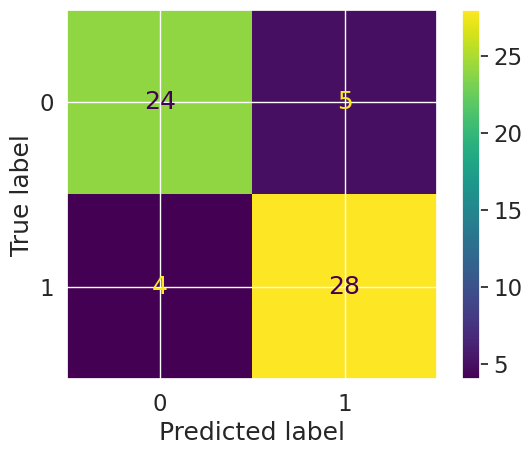

In [61]:
# The above thing in other ways
from sklearn.metrics import ConfusionMatrixDisplay

# This itself makes predictions
#ConfusionMatrixDisplay.from_estimator(estimator = clf, X = X, y = y)

# Takes predicted data
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds)

###  Classification Report

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# 5. Improving a model
First preds = baseline preds
First model = baseline model

From data perspective: </br>
more data, the better </br>
Could we improve our data ? </br>

From model perspective: </br>
Is there a better model? </br>
Could we improve the current model ? </br>

**Parameters** - model find these patterns in data </br>
**Hyperparameters** - settings on a model that we can adjust to (potentially) improve it's ability to find patterns

3 ways to set hyperparameters
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV 

In [ ]:
clf.get_params()

## 5.1 Hyperparameter Tuning by hand
Data into 3 sets -> Train, Validation, Test 

We'll try and adjust
1. `max_depth` </br>
2. `max_features` </br>
3. `min_samples_leaf` </br>
4. `min_samples_split` </br>
5. `n_estimators` </br>

In [5]:
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score 

def evaluate_preds(y_true, y_preds):
  """
  Performs evaluation
  """
  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)

  metric_dict = {"accuracy" : round(accuracy, 2), 
                 "precision" : round(precision, 2),
                 "recall" : round(recall, 2),
                 "f1" : round(f1, 2)} 
  return metric_dict

In [6]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

hd = pd.read_csv('/content/heart-disease.csv')
#Shuffle
hd_shuffled = hd.sample(frac = 1)

#Split into x and y
X = hd_shuffled.drop("target", axis = 1)
y = hd_shuffled["target"]

tr_split = round(0.7 * len(hd_shuffled))
v_split =  round(tr_split + 0.15 * len(hd_shuffled))

x_train, y_train = X[:tr_split], y[:tr_split]
x_valid, y_valid = X[tr_split : v_split], y[tr_split : v_split]
x_test, y_test =  X[v_split : ], y[v_split : ]
len(x_train), len(x_test), len(x_valid)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

#Train on train data
y_preds = clf.predict(x_valid)

#Evaluate on validation data
evaluate_preds(y_valid, y_preds)



{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [8]:
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators = 10)

clf_2.fit(x_train, y_train)
evaluate_preds(y_valid, clf_2.predict(x_valid))

{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [10]:
clf_3 = RandomForestClassifier(n_estimators=100, max_depth = 10)

clf_2.fit(x_train, y_train)
evaluate_preds(y_valid, clf_2.predict(x_valid))

{'accuracy': 0.76, 'precision': 0.79, 'recall': 0.76, 'f1': 0.78}

## 5.2 Hyperparameter Tuning Randomly with RandomizedSearchCV

In [7]:
from sklearn.model_selection import RandomizedSearchCV
grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
} 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = hd_shuffled.drop("target", axis = 1)
y = hd_shuffled["target"]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
clf = RandomForestClassifier(n_jobs = 1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf, 
                            param_distributions = grid,
                            n_iter = 10, #no of models to try
                            cv = 5,
                            verbose = 2)
rs_clf.fit(x_train, y_train)

In [15]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [16]:
evaluate_preds(y_test, rs_clf.predict(x_test))
# We don't always see any improvement

{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 5.3 Hyperparameter tuning using GridSearchCV
This doesn't have `n_iter` parameter, meaning that it'll go through every combination among the parameters given.
More like brute-force

In [19]:
# Reducing search space for parameters 

grid_2 = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [6],
    "min_samples_leaf": [1, 2]
} 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = hd_shuffled.drop("target", axis = 1)
y = hd_shuffled["target"]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
clf = RandomForestClassifier(n_jobs = 1)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator = clf, 
                            param_grid = grid_2,
                            cv = 5,
                            verbose = 2)
gs_clf.fit(x_train, y_train)
evaluate_preds(y_test, gs_clf.predict(x_test))

In [27]:
# from sklearn.metrics import 

# Let's compare different models
compare_metrics = pd.DataFrame({
    "baseline": baseline_metrics,
    "clf_2": clf_2_metrics,
    "random_search": rs_metrics,
    "grid_search": gs_metrics})

NameError: ignored

# 6. Save and Load ML models
Two ways
1. Python's `pickle` module
2. With the `joblib` module

In [32]:
import pickle

# Save a model
pickle.dump(gs_clf, open('/content/gs_clf.pkl', "wb"))

gs_clf = pickle.load(open('/content/gs_clf.pkl', "rb"))
evaluate_preds(y_test, gs_clf.predict(x_test))

{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

In [33]:
# joblib is good for fitted models like GridSearchCV and RandomSearchCV
from joblib import load, dump
dump(gs_clf, filename =  "gs_clf.joblib")
model = load(filename =  "gs_clf.joblib")
evaluate_preds(y_test, model.predict(x_test))

{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

# 7. Putting it all together

Steps to do (all in one cell)
1. Fill missing values
2. Convert data to nums
3. Build a model

In [47]:
#Libraries
import pandas as pd

# Fill missing values
from sklearn.impute import SimpleImputer

# Convert data to numeric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Sklearn pipeline
from sklearn.pipeline import Pipeline

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#Setup random seed
import numpy as np
np.random.seed(42)

#Import data and drop rows with missing lables
data = pd.read_csv('/content/car-sales-extended-missing-data.csv')
data.dropna(subset=["Price"], inplace = True)

#Define different features and transformer pipeline
cat_features = ["Make", "Colour"]
cat_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "constant", fill_value = "missing")),
    ("onehot", OneHotEncoder(handle_unknown = "ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "constant", fill_value = 4))
])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "mean"))
])

# Fill missing vals, then convert to nums
preprocessor = ColumnTransformer(transformers=[
    ("cat", cat_transformer, cat_features),
    ("door", door_transformer, door_feature),
    ("num", numeric_transformer, numeric_feature)
])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
    ])

# Split data
x = data.drop("Price", axis=1)
y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.22188417408787875

It's also possible to use `RandomizedSearchCV` or `GridSearchCV` with our `pipeline`

In [ ]:
# Use GSCV with regression pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    # preprocessor -> num -> imputer -> strategy
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split":[2, 4 ]

}

gs_model = GridSearchCV(model, pipe_grid, cv = 5, verbose = 2)
gs_model.fit(x_train, y_train)

In [52]:
gs_model.score(x_test, y_test)

0.3339554263158365